In [1]:
cd 'C:\Users\Rolex James\Documents\Coursera\ML Univ of Washington\Regression\Resources'

C:\Users\Rolex James\Documents\Coursera\ML Univ of Washington\Regression\Resources


In [2]:
import sframe, numpy as np

In [3]:
#Load the dataset
sales = sframe.SFrame('kc_house_data_small.gl/')

[INFO] SFrame v1.8.3 started. Logging C:\Users\ROLEXJ~1\AppData\Local\Temp\sframe_server_1457550141.log.0


In [4]:
sales.shape

(8703, 21)

In [5]:
#Split into training, validation and test sets
(train_and_validation, test) = sales.random_split(.8, seed=1)
(train, validation) = train_and_validation.random_split(.8, seed=1)

In [6]:
#code to convert an SFrame to a numpy array
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 #add a constant column to the SFrame
    features = ['constant'] + features
    features_sframe = data_sframe[features] #select out features specified by feature list
    #convert features_sframe to a numpy matrix
    feature_matrix = features_sframe.to_numpy()
    #assign output_sarray to the target output
    output_sarray = data_sframe[output]
    #convert sarray to a numpy array
    output_array = output_sarray.to_numpy()
    return (feature_matrix, output_array)

In [7]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix / norms
    return (normalized_features, norms)

In [8]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']

In [9]:
#Make numpy array of our features and the output
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In [10]:
features_train.shape

(5527L, 18L)

In [11]:
features_train, norms = normalize_features(features_train) # normalize training set features (columns)
features_test = features_test / norms # normalize test set by training set norms
features_valid = features_valid / norms # normalize validation set by training set norms

In [12]:
print features_test[0]
print
print features_train[9]

[ 0.01345102  0.01551285  0.01807473  0.01759212  0.00160518  0.017059    0.
  0.05102365  0.0116321   0.01564352  0.01362084  0.02481682  0.01350306
  0.          0.01345386 -0.01346927  0.01375926  0.0016225 ]

[ 0.01345102  0.01163464  0.00602491  0.0083488   0.00050756  0.01279425
  0.          0.          0.01938684  0.01390535  0.0096309   0.
  0.01302544  0.          0.01346821 -0.01346254  0.01195898  0.00156612]


In [13]:
#Function to calculate Euclidean distance between two houses
def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [14]:
dist(features_test[0], features_train[9])

0.059723593716661257

In [15]:
def euclidDist(features_test, features_train, n=10):
    for i in range(n):
        print "House ", i+1
        print "Distance from query house ", np.sqrt(np.sum((features_test[0]-features_train[i])**2))

In [16]:
euclidDist(features_test, features_train)

House  1
Distance from query house  0.060274709173
House  2
Distance from query house  0.0854688114883
House  3
Distance from query house  0.0614994643712
House  4
Distance from query house  0.0534027397882
House  5
Distance from query house  0.0584448406394
House  6
Distance from query house  0.0598792151018
House  7
Distance from query house  0.0546314049726
House  8
Distance from query house  0.0554310832416
House  9
Distance from query house  0.052383627841
House  10
Distance from query house  0.0597235937167


In [17]:
for i in xrange(3):
    print features_train[i]-features_test[0]
    # should print 3 vectors of length 18

[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
   2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
  -1.63756198e-04   0.00000000e+00  -1.70072004e-05   1.30577772e-05
  -5.14364795e-03   6.69281453e-04]
[  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
   7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
  -1.91048898e-04   6.65082271e-02   4.23240653e-05   6.22415897e-06
  -2.89330197e-03   1.47606982e-03]
[  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
   1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
  -3.13866046e-04   0.00000000e+00   4.71047219e-05   1.56530415e-05
   3.72914476e-03   1.64764925e-03]


In [18]:
print features_train[0:3] - features_test[0]

[[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
    2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
   -1.63756198e-04   0.00000000e+00  -1.70072004e-05   1.30577772e-05
   -5.14364795e-03   6.69281453e-04]
 [  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
    7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
   -1.91048898e-04   6.65082271e-02   4.23240653e-05   6.22415897e-06
   -2.89330197e-03   1.47606982e-03]
 [  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
    1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
   -3.13866046e-04   0.00000000e+00   4.71047219e-05   1.56530415e-05
    3.72914476e-03   1.64764925e-03]]


In [19]:
diff = features_train[0:len(features_train)] - features_test[0]

In [20]:
diff[-1].sum()

-0.093433960584180104

In [21]:
distances = np.sqrt(np.sum(diff**2, axis=1))

In [22]:
print np.sum(diff**2, axis=1)[15]
print np.sum(diff[15]**2)

0.00330705902879
0.00330705902879


In [23]:
distances[100]

0.023708232449603735

In [24]:
def compute_distances(feature_instances, feature_query):
    myDiff = features_train[0:len(feature_instances)] - feature_query[2]
    myDistances = np.sqrt(np.sum(myDiff**2, axis=1))
    return myDistances

In [25]:
foo = compute_distances(features_train, features_test)

In [26]:
#Get index of closest house 
np.argmin(foo)

382

In [27]:
#Let's view both houses side by side
print train[382]
print 
print test[382]

{'bathrooms': 1.5, 'sqft_above': 1010L, 'grade': 7L, 'lat': 47.42161059, 'floors': 1.0, 'constant': 1L, 'yr_renovated': 0L, 'id': '4324200060', 'date': datetime.datetime(2015, 3, 12, 0, 0, tzinfo=GMT +0.0), 'zipcode': '98031', 'long': -122.17388886, 'sqft_basement': 690L, 'yr_built': 1970L, 'sqft_lot': 8247L, 'sqft_lot15': 8400.0, 'price': 249000L, 'bedrooms': 3.0, 'waterfront': 0L, 'condition': 3L, 'sqft_living15': 1440.0, 'sqft_living': 1700.0, 'view': 0L}

{'bathrooms': 1.75, 'sqft_above': 1040L, 'grade': 7L, 'lat': 47.68731723, 'floors': 1.0, 'constant': 1L, 'yr_renovated': 0L, 'id': '2878601425', 'date': datetime.datetime(2014, 5, 22, 0, 0, tzinfo=GMT +0.0), 'zipcode': '98115', 'long': -122.32090698, 'sqft_basement': 610L, 'yr_built': 1908L, 'sqft_lot': 5100L, 'sqft_lot15': 5100.0, 'price': 600000L, 'bedrooms': 3.0, 'waterfront': 0L, 'condition': 5L, 'sqft_living15': 1540.0, 'sqft_living': 1650.0, 'view': 0L}


In [28]:
def k_nearest_neighbours(k, features_train, features_test):
    myDiff = features_train[0:len(features_train)] - features_test[2]
    myDistances = np.sqrt(np.sum(myDiff**2, axis=1))
    sortDist = np.argsort(myDistances) #not really sorted
    neighbours = sortDist[0:k]
    return neighbours

In [29]:
k_nearest_neighbours(4, features_train, features_test)

array([ 382, 1149, 4087, 3142], dtype=int64)

In [30]:
def predFromKNN(k, features_train, output_train, features_test):
    myDiff = features_train[0:len(features_train)] - features_test[2]
    myDistances = np.sqrt(np.sum(myDiff**2, axis=1))
    sortDist = np.argsort(myDistances) #not really sorted
    sortInd = sortDist[0:k]
    pred = np.mean(output_train[sortInd])
    return pred

In [31]:
predFromKNN(4, features_train, output_train, features_test)

413987.5

In [32]:
def multPredFromKNN(k, features_train, output_train, query_set):
    priceList = []
    for i in xrange(query_set.shape[0]):
        myDiff = features_train[0:len(features_train)] - query_set[i]
        myDistances = np.sqrt(np.sum(myDiff**2, axis=1))
        sortDist = np.argsort(myDistances) #not really sorted
        sortInd = sortDist[0:k]
        pred = np.mean(output_train[sortInd])
        priceList.append(pred)
    return np.array(priceList)

In [33]:
KNN_preds = multPredFromKNN(10, features_train, output_train, features_test[1:10])

In [34]:
KNN_preds

array([ 431860. ,  460595. ,  430200. ,  766750. ,  667420. ,  350032. ,
        512800.7,  484000. ,  457235. ])

In [35]:
np.argmin(KNN_preds)

5

In [36]:
def get_RSS(predictions, output):
    resid = output - predictions
    temp = resid**2
    RSS = sum(temp)
    return RSS

In [37]:
all_RSS = [] #list to store RSS values

In [38]:
#Find the best the value of k in a range of values
def find_best_RSS(query_set):
    for k in xrange(1, 16):
        myPred = multPredFromKNN(k, features_train, output_train, query_set)
        tempRSS = get_RSS(myPred, output_valid)
        all_RSS.append(tempRSS)
    return np.array(all_RSS)

In [39]:
RSS_list = find_best_RSS(features_valid)

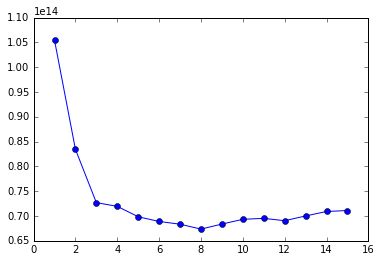

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 16)
plt.plot(kvals, RSS_list,'bo-')

In [41]:
#Best k = 8
#Use k = 8 for prediction on the test set
KNN_8 = multPredFromKNN(8, features_train, output_train, features_test)

In [42]:
get_RSS(KNN_8, output_test)

133118823551516.81